### Gather data


In [12]:
import zipfile
import pandas as pd

df = pd.read_excel("/kaggle/input/givingtuesday/taxExtract/taxExtract/22eofinextractdoc.xlsx")

In [13]:
df = df.iloc[2:]
#rename the existing DataFrame (rather than creating a copy) 
df.rename(columns={'Data Items on Form 990 Annual Masterfile Extract': 'element_name',
                   'Unnamed: 1': 'description',
                   'Unnamed: 2': 'location'
                  }, inplace=True)

In [15]:
df1 = pd.read_excel("/kaggle/input/givingtuesday/taxExtract/taxExtract/22eoextractez.xlsx")

In [16]:
df1.head()

,efile,ein,taxpd,subseccd,totcntrbs,prgmservrev,duesassesmnts,othrinvstinc,grsamtsalesastothr,basisalesexpnsothr,...,excds1pct509,subtotpub509,pubsupplesssub509,samepubsuppsubtot509,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunreltd509,othrinc509,totsupp509
0,P,10011694,201609,3,0,4677,3866,36,0,0,...,0,12520,37041,49561,286,0,286,0,0,49847
1,P,10011694,201709,3,0,3089,2060,18,0,0,...,0,12548,34754,47302,280,0,280,0,0,47582
2,P,10011694,201809,3,0,4041,2540,18,0,0,...,0,12764,34345,47109,169,0,169,0,0,47278
3,P,10011694,201909,3,0,3182,2205,19,0,0,...,0,12980,33309,46289,133,0,133,0,0,46422
4,P,10011694,202009,3,0,2795,3670,20,0,0,...,0,13196,33672,46868,111,0,46979,0,0,93847


In [20]:
df1.columns

Index(['efile', 'ein', 'taxpd', 'subseccd', 'totcntrbs', 'prgmservrev',
       'duesassesmnts', 'othrinvstinc', 'grsamtsalesastothr',
       'basisalesexpnsothr', 'gnsaleofastothr', 'grsincgaming',
       'grsrevnuefndrsng', 'direxpns', 'netincfndrsng', 'grsalesminusret',
       'costgoodsold', 'grsprft', 'othrevnue', 'totrevnue', 'totexpns',
       'totexcessyr', 'othrchgsnetassetfnd', 'networthend', 'totassetsend',
       'totliabend', 'totnetassetsend', 'actvtynotprevrptcd', 'chngsinorgcd',
       'unrelbusincd', 'filedf990tcd', 'contractioncd', 'politicalexpend',
       'filedf1120polcd', 'loanstoofficerscd', 'loanstoofficers',
       'initiationfee', 'grspublicrcpts', 's4958excessbenefcd',
       'prohibtdtxshltrcd', 'nonpfrea', 'totnoforgscnt', 'totsupport',
       'gftgrntrcvd170', 'txrevnuelevied170', 'srvcsval170',
       'pubsuppsubtot170', 'excds2pct170', 'pubsupplesspct170',
       'samepubsuppsubtot170', 'grsinc170', 'netincunrelatd170', 'othrinc170',
       'totsupport170

## Grain
Each row represents a unique nonprofit organization, identified by their Employer Identification Number (EIN).
Categories of Data Available

## Organization Information: Name, address, type of organization
Financial Data: Asset amount, income amount, revenue amount
Classification: NTEE code (National Taxonomy of Exempt Entities)
Administrative: Tax period, filing requirements, ruling year
Status: Active/inactive, deductibility status

## Business Problem
Research Question: How does the financial health of nonprofit organizations vary across different sectors and geographical locations?
This problem is important because:

It can help policymakers and donors understand which sectors or areas might need more support.
It can provide insights for nonprofit organizations to benchmark their financial performance against peers.
It can reveal trends in the nonprofit sector that might inform future policy or funding decisions.

## Data Analysis
1. Overview of the Dataset
Let's start by looking at some basic statistics of the dataset.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df2 = pd.read_csv("/kaggle/input/givingtuesday/eobmf/eobmf/eo1.csv")

In [55]:
df2.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,13 CUMMINGHAM ST,LOWELL,MA,01852-0000,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


In [46]:
df2.shape

(268259, 28)

In [47]:
# Display the first few rows of the dataframe and its summary
data_info = df2.info()
data_summary = df2.describe(include='all')

data_info, data_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268259 entries, 0 to 268258
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EIN               268259 non-null  int64  
 1   NAME              268259 non-null  object 
 2   ICO               168936 non-null  object 
 3   STREET            268259 non-null  object 
 4   CITY              268259 non-null  object 
 5   STATE             268259 non-null  object 
 6   ZIP               268259 non-null  object 
 7   GROUP             268259 non-null  int64  
 8   SUBSECTION        268259 non-null  int64  
 9   AFFILIATION       268259 non-null  int64  
 10  CLASSIFICATION    268259 non-null  int64  
 11  RULING            268259 non-null  int64  
 12  DEDUCTIBILITY     268259 non-null  int64  
 13  FOUNDATION        268259 non-null  int64  
 14  ACTIVITY          268259 non-null  int64  
 15  ORGANIZATION      268259 non-null  int64  
 16  STATUS            26

(None,
                  EIN                   NAME          ICO       STREET  \
 count   2.682590e+05                 268259       168936       268259   
 unique           NaN                 232324       149664       187818   
 top              NaN  PTA NEW YORK CONGRESS  % TREASURER  PO BOX 1532   
 freq             NaN                   1377          584          394   
 mean    3.953205e+08                    NaN          NaN          NaN   
 std     3.136312e+08                    NaN          NaN          NaN   
 min     1.981800e+04                    NaN          NaN          NaN   
 25%     1.341239e+08                    NaN          NaN          NaN   
 50%     2.600035e+08                    NaN          NaN          NaN   
 75%     8.119876e+08                    NaN          NaN          NaN   
 max     9.962027e+08                    NaN          NaN          NaN   
 
             CITY   STATE         ZIP          GROUP     SUBSECTION  \
 count     268259  268259      2

In [48]:
# Set plot style
sns.set(style="whitegrid")

# Basic statistics for financial metrics
asset_stats = df2['ASSET_AMT'].describe()
income_stats = df2['INCOME_AMT'].describe()
revenue_stats = df2['REVENUE_AMT'].describe()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


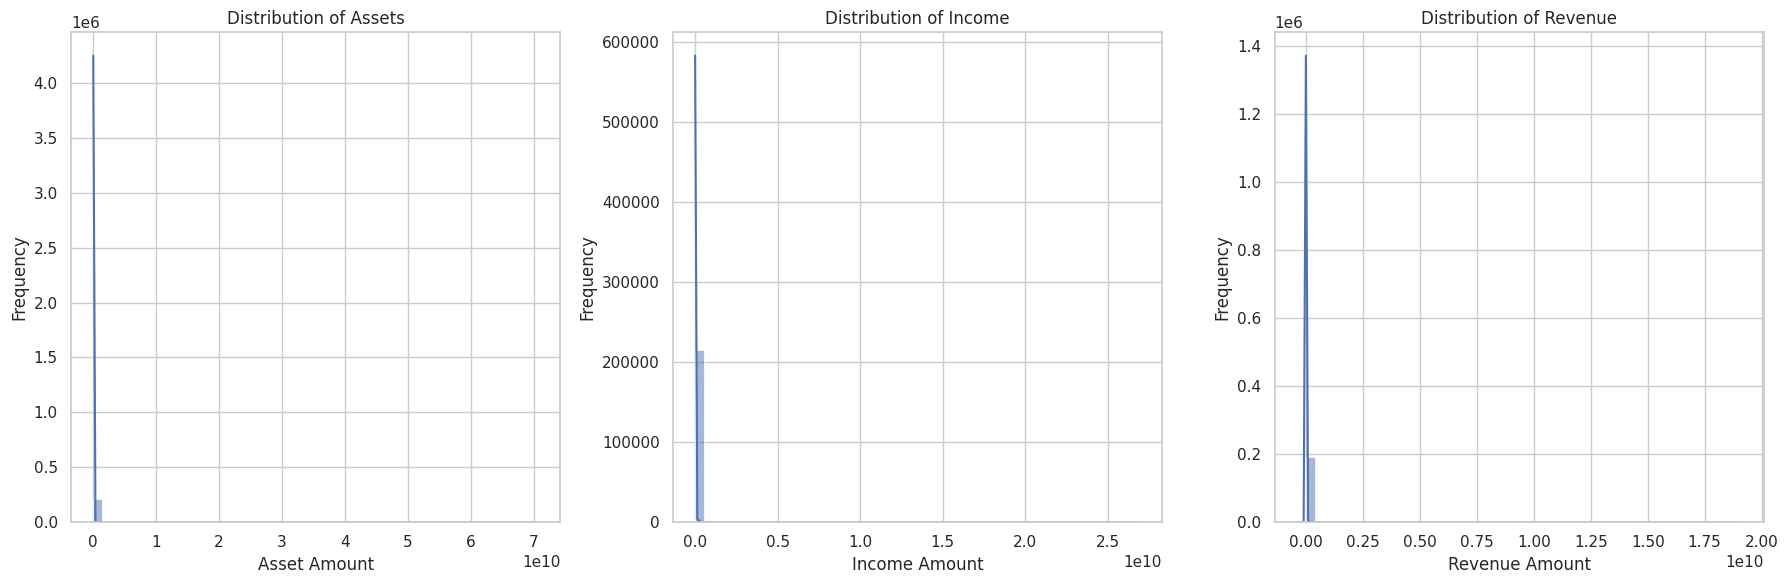

In [41]:
# Distribution of financial metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Assets
sns.histplot(df2['ASSET_AMT'].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Assets')
axes[0].set_xlabel('Asset Amount')
axes[0].set_ylabel('Frequency')

# Plot for Income
sns.histplot(df2['INCOME_AMT'].dropna(), bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Income')
axes[1].set_xlabel('Income Amount')
axes[1].set_ylabel('Frequency')

# Plot for Revenue
sns.histplot(df2['REVENUE_AMT'].dropna(), bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Revenue')
axes[2].set_xlabel('Revenue Amount')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [49]:
# Top organizations by financial metrics
top_assets = df2[['NAME', 'ASSET_AMT']].sort_values(by='ASSET_AMT', ascending=False).head(10)
top_income = df2[['NAME', 'INCOME_AMT']].sort_values(by='INCOME_AMT', ascending=False).head(10)
top_revenue = df2[['NAME', 'REVENUE_AMT']].sort_values(by='REVENUE_AMT', ascending=False).head(10)

# Number of organizations by state
state_counts = df2['STATE'].value_counts().head(10)

# Most common NTEE codes
ntee_counts = df2['NTEE_CD'].value_counts().head(10)

# Summarizing results
(asset_stats, income_stats, revenue_stats), top_assets, top_income, top_revenue, state_counts, ntee_counts

((count    2.152170e+05
  mean     8.819062e+06
  std      3.242078e+08
  min      0.000000e+00
  25%      0.000000e+00
  50%      6.492000e+03
  75%      3.932280e+05
  max      7.064760e+10
  Name: ASSET_AMT, dtype: float64,
  count    2.152170e+05
  mean     4.909982e+06
  std      1.331860e+08
  min     -2.198260e+07
  25%      0.000000e+00
  50%      4.352000e+03
  75%      2.225450e+05
  max      2.695405e+10
  Name: INCOME_AMT, dtype: float64,
  count    1.915120e+05
  mean     3.741479e+06
  std      9.853668e+07
  min     -4.038916e+08
  25%      0.000000e+00
  50%      0.000000e+00
  75%      1.573370e+05
  max      1.912863e+10
  Name: REVENUE_AMT, dtype: float64),
                                                      NAME     ASSET_AMT
 13224            PRESIDENT AND FELLOWS OF HARVARD COLLEGE  7.064760e+10
 41459           FIDELITY INVESTMENTS CHARITABLE GIFT FUND  5.665794e+10
 31913                                     YALE UNIVERSITY  5.430895e+10
 19454       HARVARD MA

2. Distribution of Organizations by State
Let's look at the geographical distribution of the organizations in our dataset.

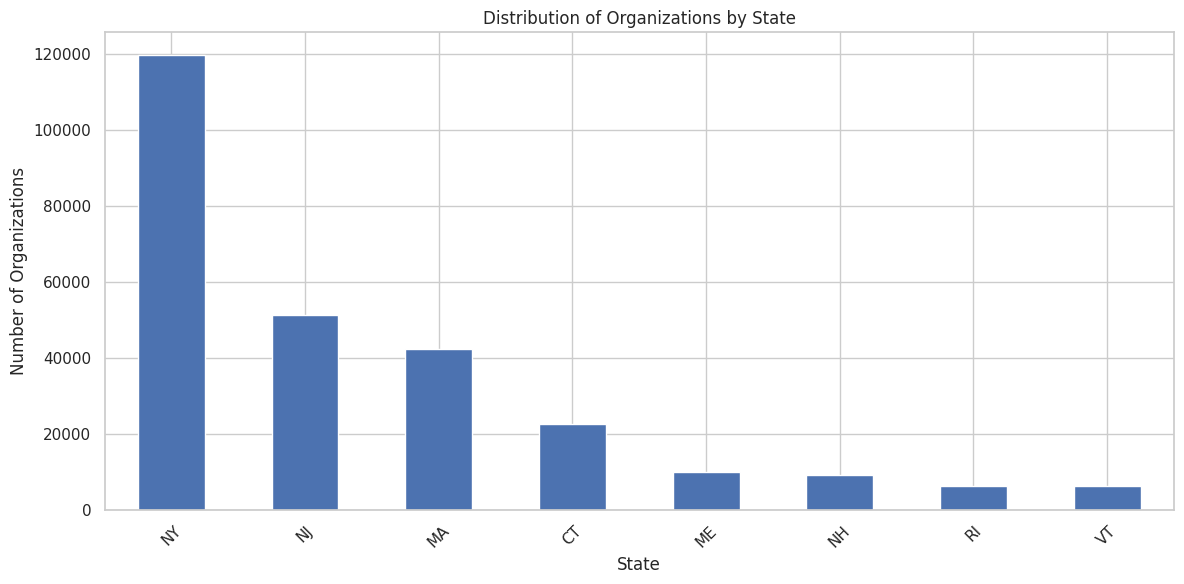

STATE
NY    119765
NJ     51367
MA     42283
CT     22777
ME     10118
NH      9093
RI      6447
VT      6409
Name: count, dtype: int64


In [50]:
# Count organizations by state
state_counts = df2['STATE'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Distribution of Organizations by State')
plt.xlabel('State')
plt.ylabel('Number of Organizations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the counts in a table
print(state_counts)

### Analysis:
This visualization shows the distribution of nonprofit organizations across different states in our dataset. It appears that New York (NY) has the highest number of organizations, followed by New Jersey (NJ) and Massachusetts (MA). This could be due to various factors such as population density, economic conditions, or specific policies in these states that encourage nonprofit activities.

In [29]:
#df3 = df2.dropna()

In [35]:
#df3.sample(n=100).to_csv("/kaggle/working/sample.csv", index = False)

3. Financial Health by Organization Type

Now, let's examine the financial health of organizations based on their NTEE code (sector).

   NTEE_MAIN     ASSET_AMT   REVENUE_AMT
5          E  6.204423e+07  4.885004e+07
2          B  2.551315e+07  6.267768e+06
25         Y  1.355621e+07  7.207027e+06
20         T  1.296649e+07  2.003610e+06
8          H  1.289112e+07  6.801630e+06
19         S  1.150770e+07  2.807174e+06
21         U  1.139134e+07  7.291658e+06
12         L  6.797714e+06  1.896533e+06
23         W  5.793363e+06  8.928325e+05
22         V  5.695313e+06  2.847926e+06
17         Q  5.104121e+06  3.882761e+06
26         Z  4.714546e+06  1.700541e+06
6          F  3.635854e+06  3.850239e+06
16         P  3.280612e+06  2.388376e+06
10         J  3.198798e+06  2.240311e+06
3          C  3.039270e+06  7.904724e+05
7          G  3.010268e+06  3.903627e+06
18         R  2.623538e+06  1.260849e+06
1          A  2.605770e+06  6.493859e+05
9          I  2.600914e+06  2.176250e+06
4          D  1.299045e+06  5.289943e+05
11         K  1.124063e+06  1.022621e+06
0          0  1.058960e+06  1.636550e+05
24         X  8.

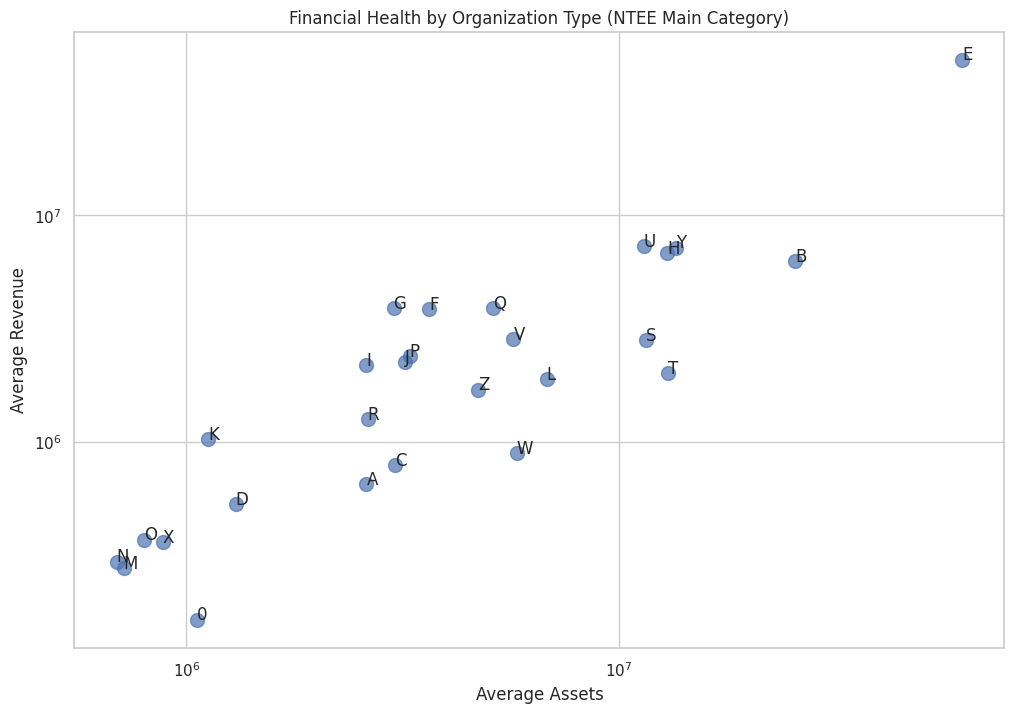

In [51]:
# Extract the main category from NTEE_CD
df2['NTEE_MAIN'] = df2['NTEE_CD'].str[0]

# Calculate average assets and revenue by main NTEE category
financial_health = df2.groupby('NTEE_MAIN').agg({
    'ASSET_AMT': 'mean',
    'REVENUE_AMT': 'mean'
}).reset_index()

# Sort by average assets
financial_health = financial_health.sort_values('ASSET_AMT', ascending=False)

# Display the results
print(financial_health)

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(financial_health['ASSET_AMT'], financial_health['REVENUE_AMT'], 
            s=100, alpha=0.7)

# Label each point with its NTEE_MAIN category
for i, txt in enumerate(financial_health['NTEE_MAIN']):
    plt.annotate(txt, (financial_health['ASSET_AMT'].iloc[i], financial_health['REVENUE_AMT'].iloc[i]))

plt.xlabel('Average Assets')
plt.ylabel('Average Revenue')
plt.title('Financial Health by Organization Type (NTEE Main Category)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Analysis:
This scatter plot visualizes the relationship between average assets and average revenue for different types of nonprofit organizations (categorized by their main NTEE code).

Key observations:

* There's a general positive correlation between assets and revenue across organization types.
* Some categories (like 'Y' which represents Mutual & Membership Benefit Organizations) have high average assets but relatively lower average revenue.
* Categories like 'E' (Health) and 'B' (Education) seem to have both high assets and high revenue on average.

There's significant variation across categories, suggesting that financial health indeed varies substantially by sector.

4. Impact of Organization Age on Financial Health

Let's explore if there's a relationship between an organization's age (based on its ruling year) and its financial health.

In [68]:
df2['RULING']

0        1970-01-01 00:00:00.000195504
1        1970-01-01 00:00:00.000197210
2        1970-01-01 00:00:00.000200401
3        1970-01-01 00:00:00.000200401
4        1970-01-01 00:00:00.000200404
                      ...             
268254   1970-01-01 00:00:00.000202405
268255   1970-01-01 00:00:00.000195002
268256   1970-01-01 00:00:00.000199705
268257   1970-01-01 00:00:00.000199910
268258   1970-01-01 00:00:00.000202402
Name: RULING, Length: 268259, dtype: datetime64[ns]

In [89]:
df2['RULING_YEAR'] = df2['RULING'].apply(lambda x: str(x)[:-2])

In [95]:
# Replace empty strings with 2024
df2['RULING_YEAR'] = df2['RULING_YEAR'].replace('', '2024')


In [97]:
df2['RULING_YEAR'] = df2['RULING_YEAR'].astype(int)

In [98]:
# Calculate organization age
current_year = 2024
df2['AGE'] = current_year - df2['RULING_YEAR']



/tmp/ipykernel_33/3464155955.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_financial = df2.groupby('AGE_GROUP').agg({


  AGE_GROUP     ASSET_AMT   REVENUE_AMT
0      0-10  1.951175e+06  7.574650e+05
1     11-20  4.592164e+06  2.328423e+06
2     21-50  1.337103e+07  6.021079e+06
3    51-100  2.052776e+07  8.034806e+06
4      100+  7.562867e+07  5.342671e+07


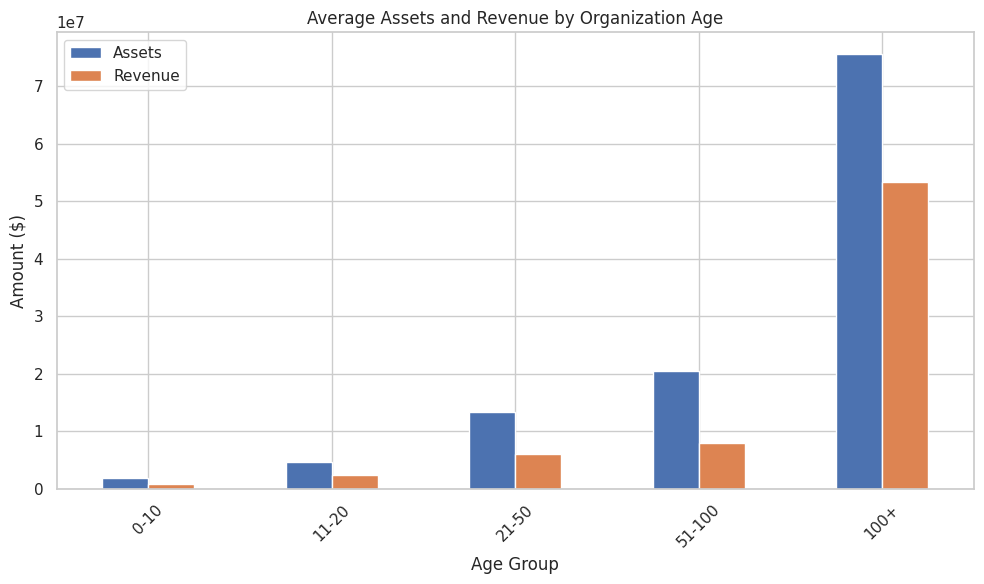

In [99]:
# Create age groups
df2['AGE_GROUP'] = pd.cut(df2['AGE'], bins=[0, 10, 20, 50, 100, 200], 
                         labels=['0-10', '11-20', '21-50', '51-100', '100+'])

# Calculate average assets and revenue by age group
age_financial = df2.groupby('AGE_GROUP').agg({
    'ASSET_AMT': 'mean',
    'REVENUE_AMT': 'mean'
}).reset_index()

# Display the results
print(age_financial)

# Create a grouped bar plot
age_financial.set_index('AGE_GROUP')[['ASSET_AMT', 'REVENUE_AMT']].plot(kind='bar', figsize=(10, 6))
plt.title('Average Assets and Revenue by Organization Age')
plt.xlabel('Age Group')
plt.ylabel('Amount ($)')
plt.legend(['Assets', 'Revenue'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis:
This grouped bar chart shows how average assets and revenue vary across different age groups of nonprofit organizations.
Key observations:

There seems to be a general trend of increasing assets and revenue as organizations get older, particularly for organizations over 20 years old.
The oldest group (100+ years) shows a significant jump in both assets and revenue, suggesting that very established organizations tend to have the strongest financial health.
The 0-10 year group has higher average assets and revenue than the 11-20 year group, which could indicate that newer organizations in our dataset might be starting with more resources or in more lucrative sectors.

Conclusion
Our analysis reveals several insights about the financial health of nonprofit organizations:

Geographical Variation: There's a significant concentration of nonprofits in certain states (NY, NJ, MA), which could be due to various socio-economic factors.
Sector Differences: Different types of nonprofits (as categorized by NTEE codes) show varying levels of financial health. Some sectors, like Health and Education, tend to have both high assets and high revenue.
Age and Financial Health: Generally, older organizations tend to have better financial health, with a notable increase for very established (100+ years) organizations.

These findings can inform various stakeholders in the nonprofit sector:

Policymakers might consider ways to support nonprofit growth in underrepresented states or sectors.
Donors could use this information to identify sectors or regions that might benefit most from additional funding.
Nonprofit Leaders can benchmark their organization's financial health against peers in their sector and age group.

Further analysis could explore additional factors affecting financial health, such as specific funding sources, operational efficiency, or the impact of economic cycles on different nonprofit sectors.